<a href="https://colab.research.google.com/github/dhaneshwaritendle/PCOS_diagnosis/blob/main/PCOS_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline


/content/drive/MyDrive/PCOS_data_without_infertility.xlsx

In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.6 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### **LOADING DATA**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/PCOS_data_without_infertility.xlsx', sheet_name= 'Full_new')

In [ ]:
# Looking at the data
data.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


### **DATA PREPROCESSING**

In [ ]:
# Display information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [ ]:
# Changing the title of the properties.

data = data.rename(columns = {"PCOS (Y/N)":"Target"})

In [ ]:
# Dropping unnecessary features.

data = data.drop(["Sl. No","Patient File No.","Unnamed: 44"],axis = 1)

In [ ]:
data.columns

Index(['Target', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of aborptions', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [ ]:
# Display detailed information about the DataFrame, excluding null counts
data.info(verbose = True, null_counts = False)

TypeError: DataFrame.info() got an unexpected keyword argument 'null_counts'

In [ ]:
# Having a look at the data with dtype objects.

data["AMH(ng/mL)"].head()

In [ ]:
# Similarly,

data["II    beta-HCG(mIU/mL)"].head()

In [ ]:
# Dealing with categorical values.
# In this database the type objects are numeric values saved as strings.
# So here we are just converting it into a numeric value.

data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')

data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

In [ ]:
# Check for missing values in the DataFrame and sum them up
data.isnull().sum()

In [ ]:
# Drop rows with missing values from the DataFrame
data.dropna(inplace=True)


In [ ]:
# Dealing with missing values.
# Filling NA values with the median of that feature.


# data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)

# data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].median(),inplace=True)

# data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(),inplace=True)

# data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(),inplace=True)

In [ ]:
# Clearing up the extra space in the column names.

data.columns = [col.strip() for col in data.columns]

In [ ]:
# Check the shape (number of rows and columns) of the DataFrame
data.shape

## **Variable Description**

In [ ]:
colors = ['#670067','#008080']

In [ ]:
#Identifying numerical and categorical features in dataframe
numerical_variables = []
categorical_variables = []
for x in data.columns:
    if len(data[x].value_counts()) < 9:
        if x not in ["RR (breaths/min)", "Cycle(R/I)", "No. of aborptions", "BP _Systolic (mmHg)", "BP _Diastolic (mmHg)"]:
            categorical_variables.append(x)
    else:
        numerical_variables.append(x)

In [ ]:
numerical_variables

In [ ]:
categorical_variables

# Categorical Variable

In [ ]:
def bar_plot(variable):
    """
     input: variable example : Target
     output: bar plot & value count

    """
    # Get feature
    var = data[variable]
    # Count number of categorical variable(value/sample)
    varValue = var.value_counts()
    # Visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index,varValue,color=colors)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Count")
    plt.title(variable)
    plt.show()
    # Display the value count
    print("{}: \n {}".format(variable,varValue))

In [ ]:
category = ["Target", "Pregnant(Y/N)", "Weight gain(Y/N)", "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)", "Pimples(Y/N)", "Fast food (Y/N)", "Reg.Exercise(Y/N)", "Blood Group"]
# Iterate over each category in the list 'category' and generate bar plots
for c in category:
    bar_plot(c)

Blood Group indications


*   A+ = 11
*   A- = 12
*   B+ = 13
*   B- = 14
*   O+ =15
*   O- = 16
*   AB+ =17
*   AB- = 18

# Numerical Variable

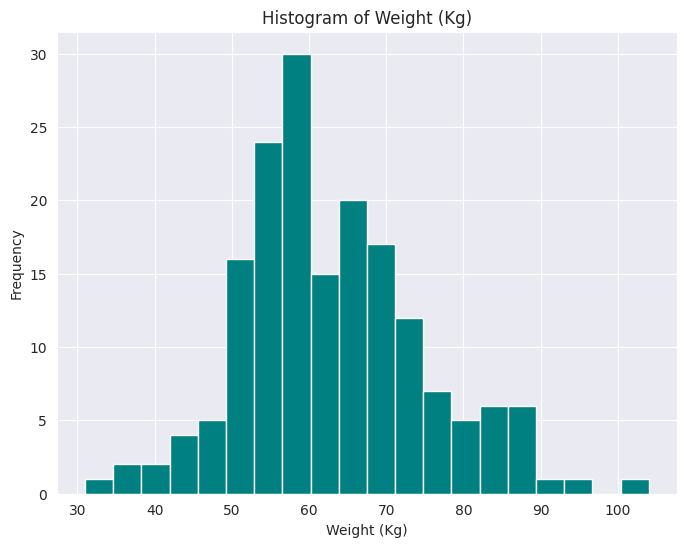

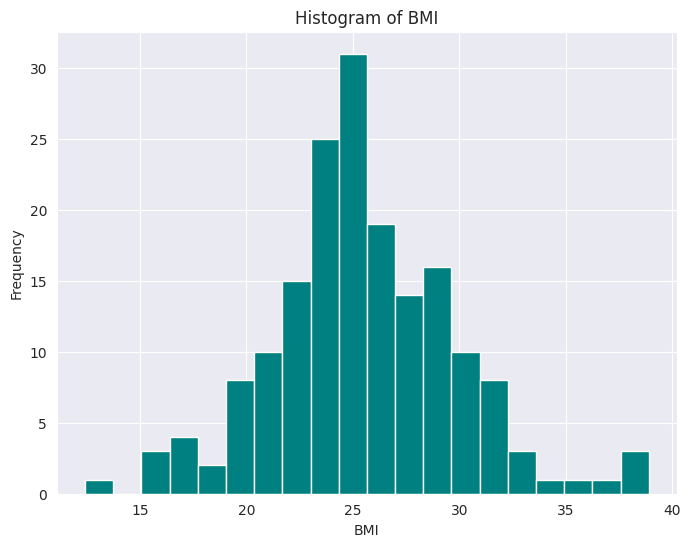

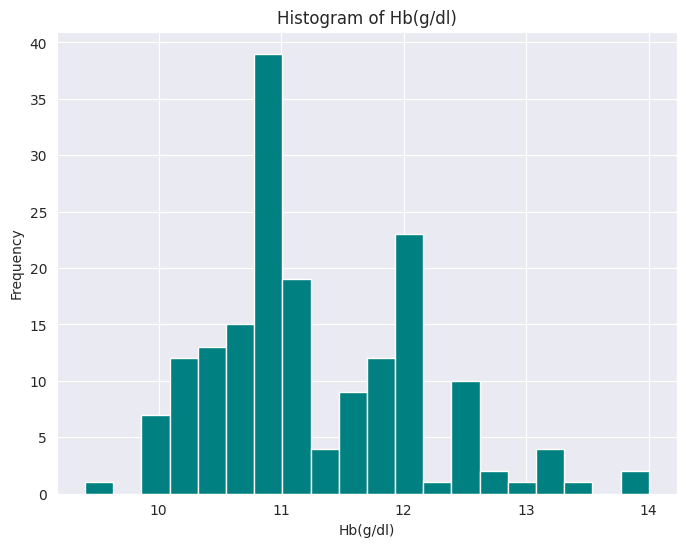

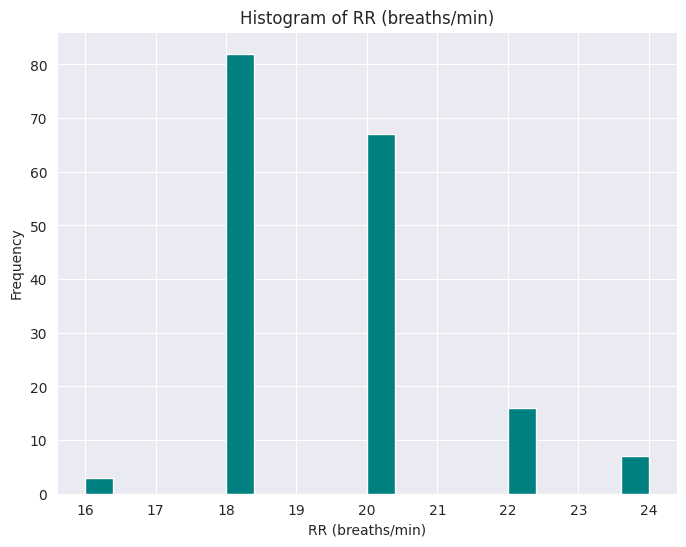

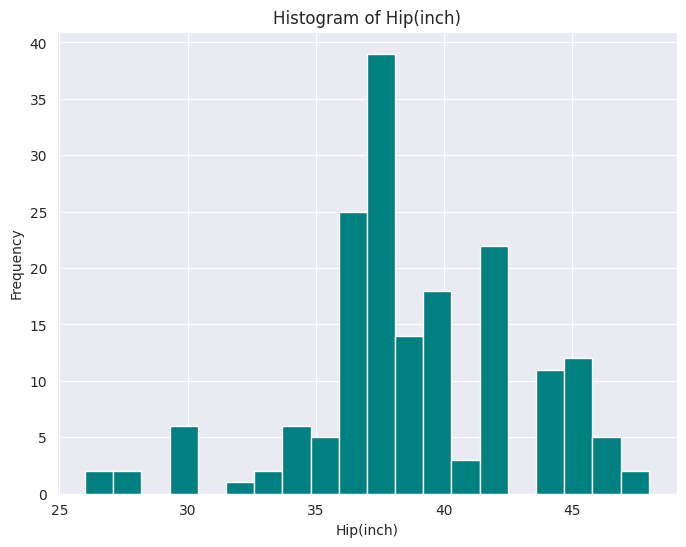

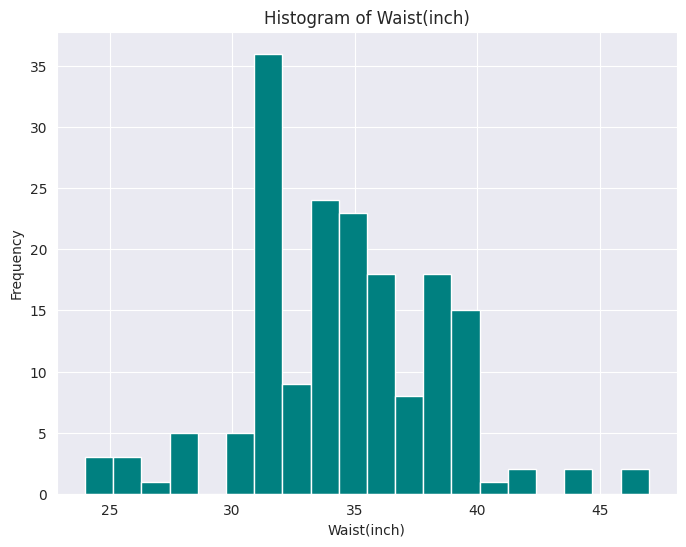

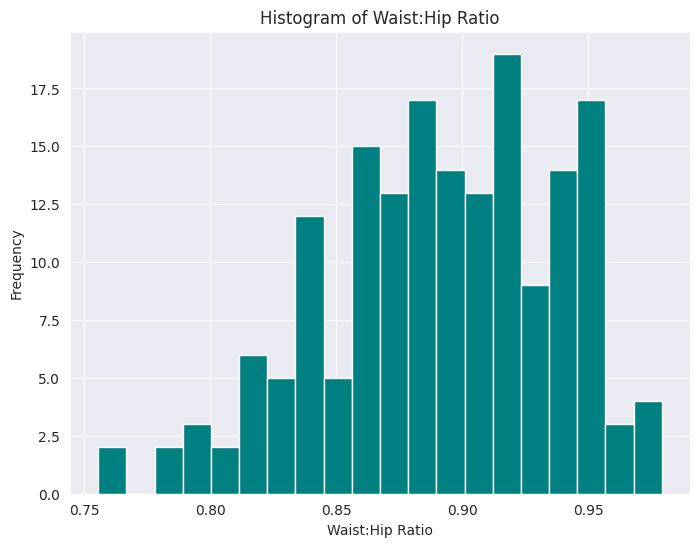

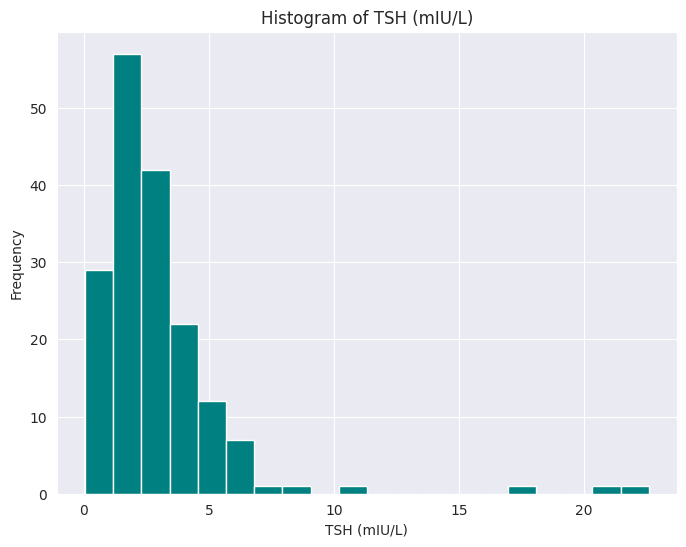

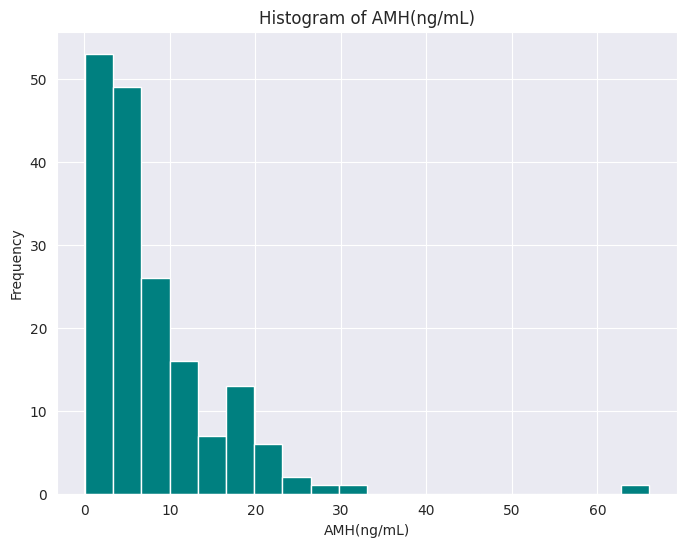

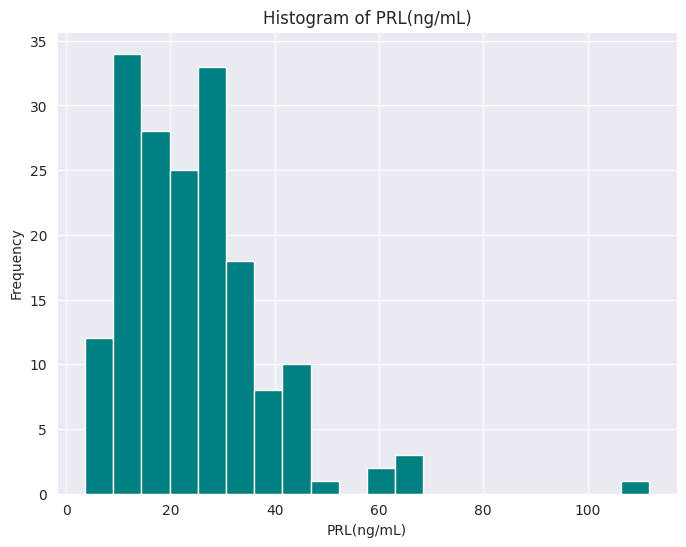

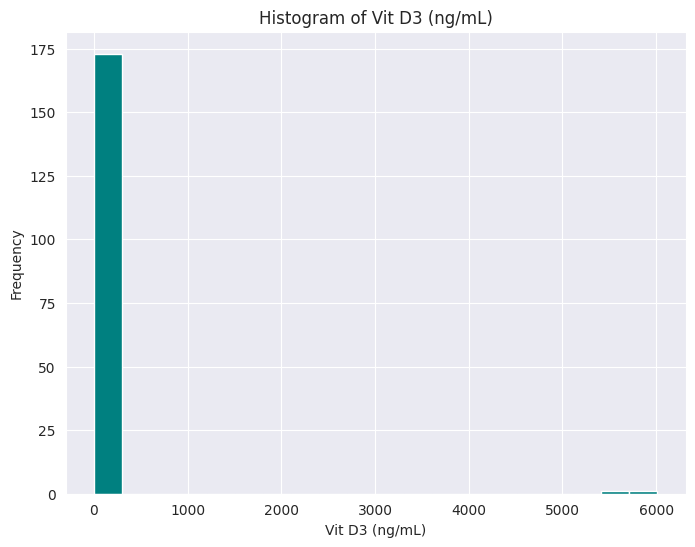

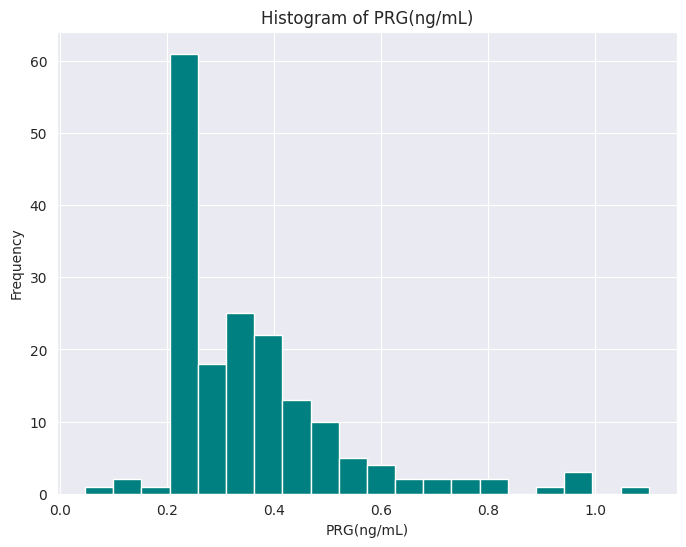

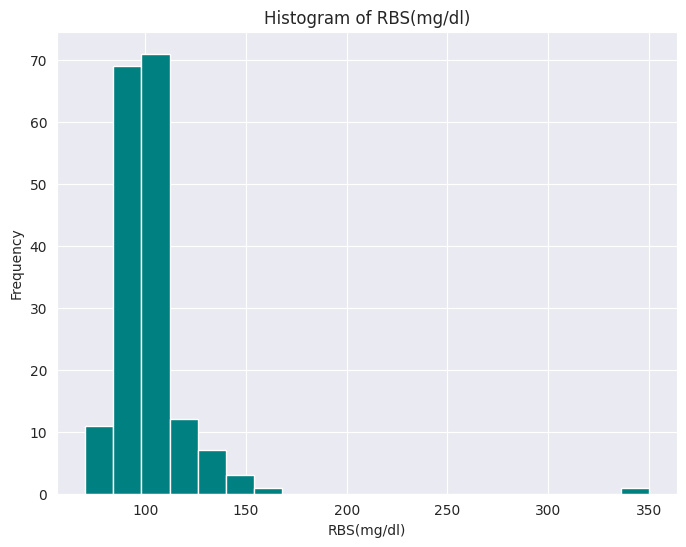

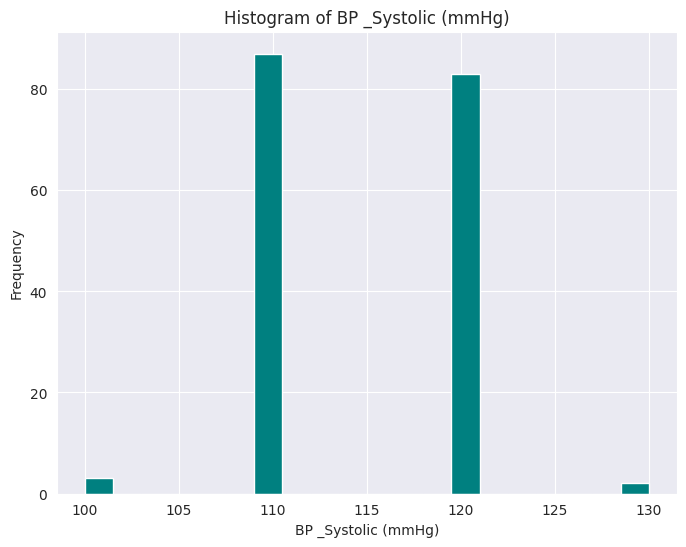

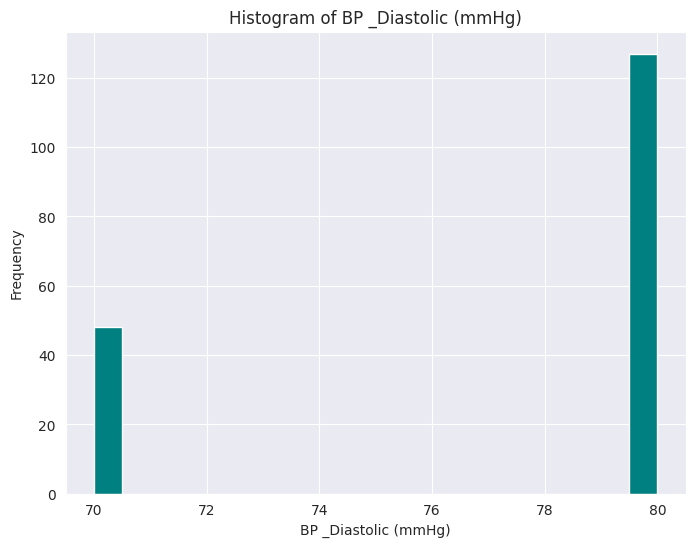

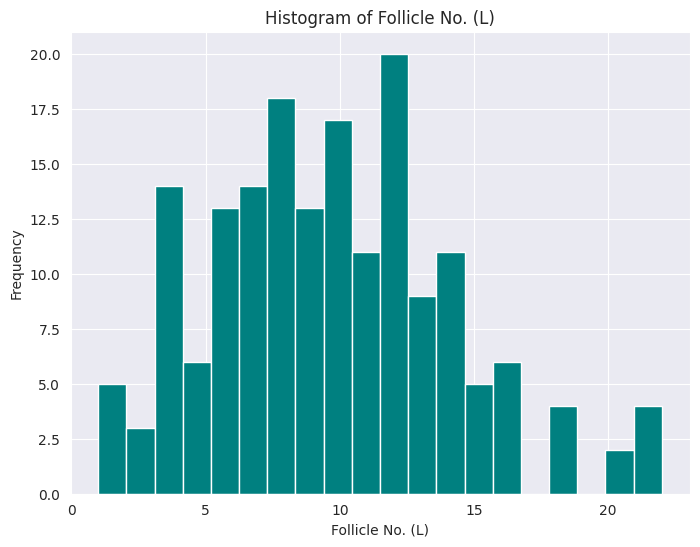

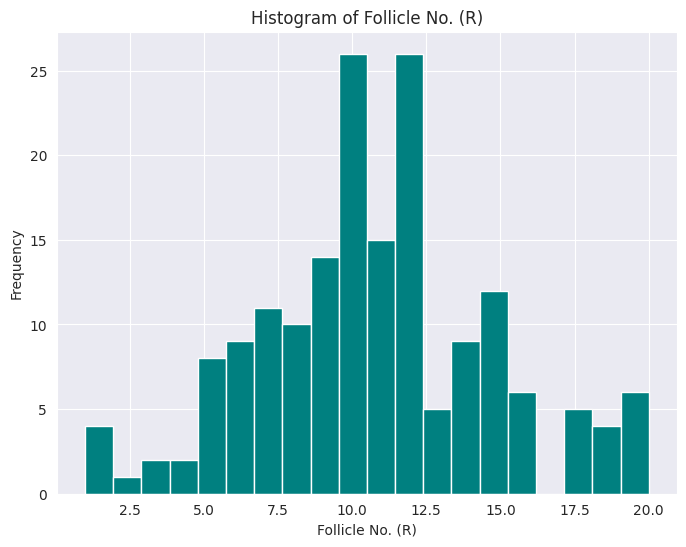

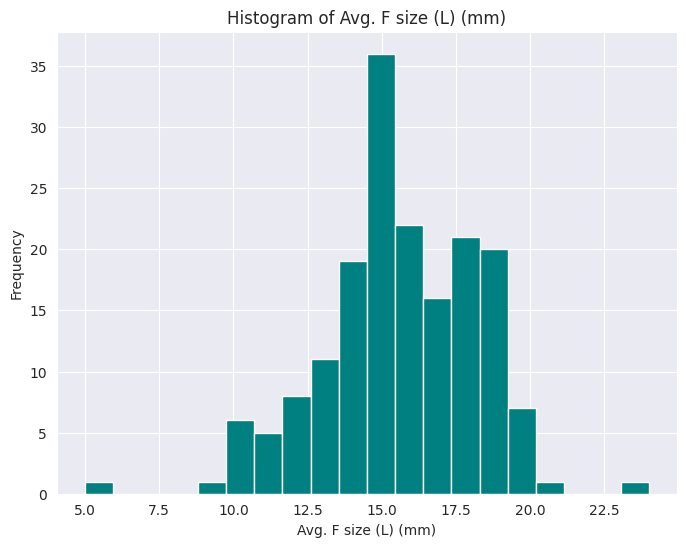

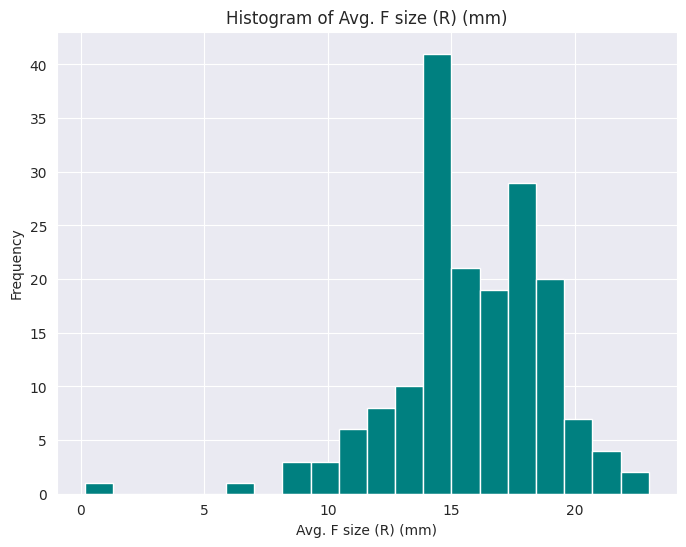

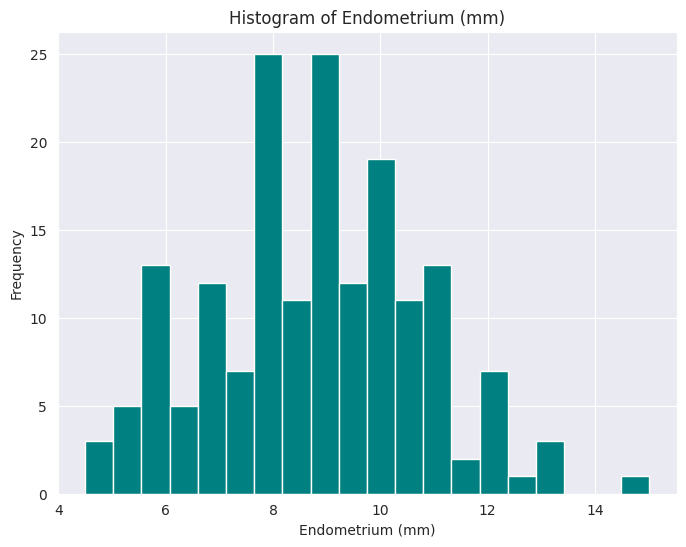

In [ ]:
# List of numerical attributes for distribution analysis
numerical_variables = ['Weight (Kg)', 'BMI', 'Hb(g/dl)','RR (breaths/min)',
                        'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
                        'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)',
                        'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
                        'Endometrium (mm)']
data_pcos = data[data['Target']==1]
# Create histograms for each numerical attribute
for attribute in numerical_variables:
    plt.figure(figsize=(8, 6))
    plt.hist(data_pcos[attribute], bins=20, color=colors[1])
    plt.title(f'Histogram of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

### **EXPLORATORY DATA ANALYSIS (EDA)**

In [ ]:
# Having a look at some basic statistical details.
data.describe()

,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,...,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,0.325885,31.435754,59.680633,156.492171,24.327726,13.800745,73.249534,19.238361,11.161229,2.556797,...,0.491620,0.515829,0.243948,114.659218,76.960894,6.113594,6.635009,15.008939,15.445754,8.469963
std,0.469141,5.406608,11.028685,6.041379,4.059454,1.845567,4.445894,1.689238,0.869186,0.900371,...,0.500396,0.500215,0.429862,7.374148,5.569134,4.226796,4.443774,3.568414,3.325234,2.160065
min,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.707923,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.600000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.666667,15.000000,74.000000,20.000000,11.800000,4.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


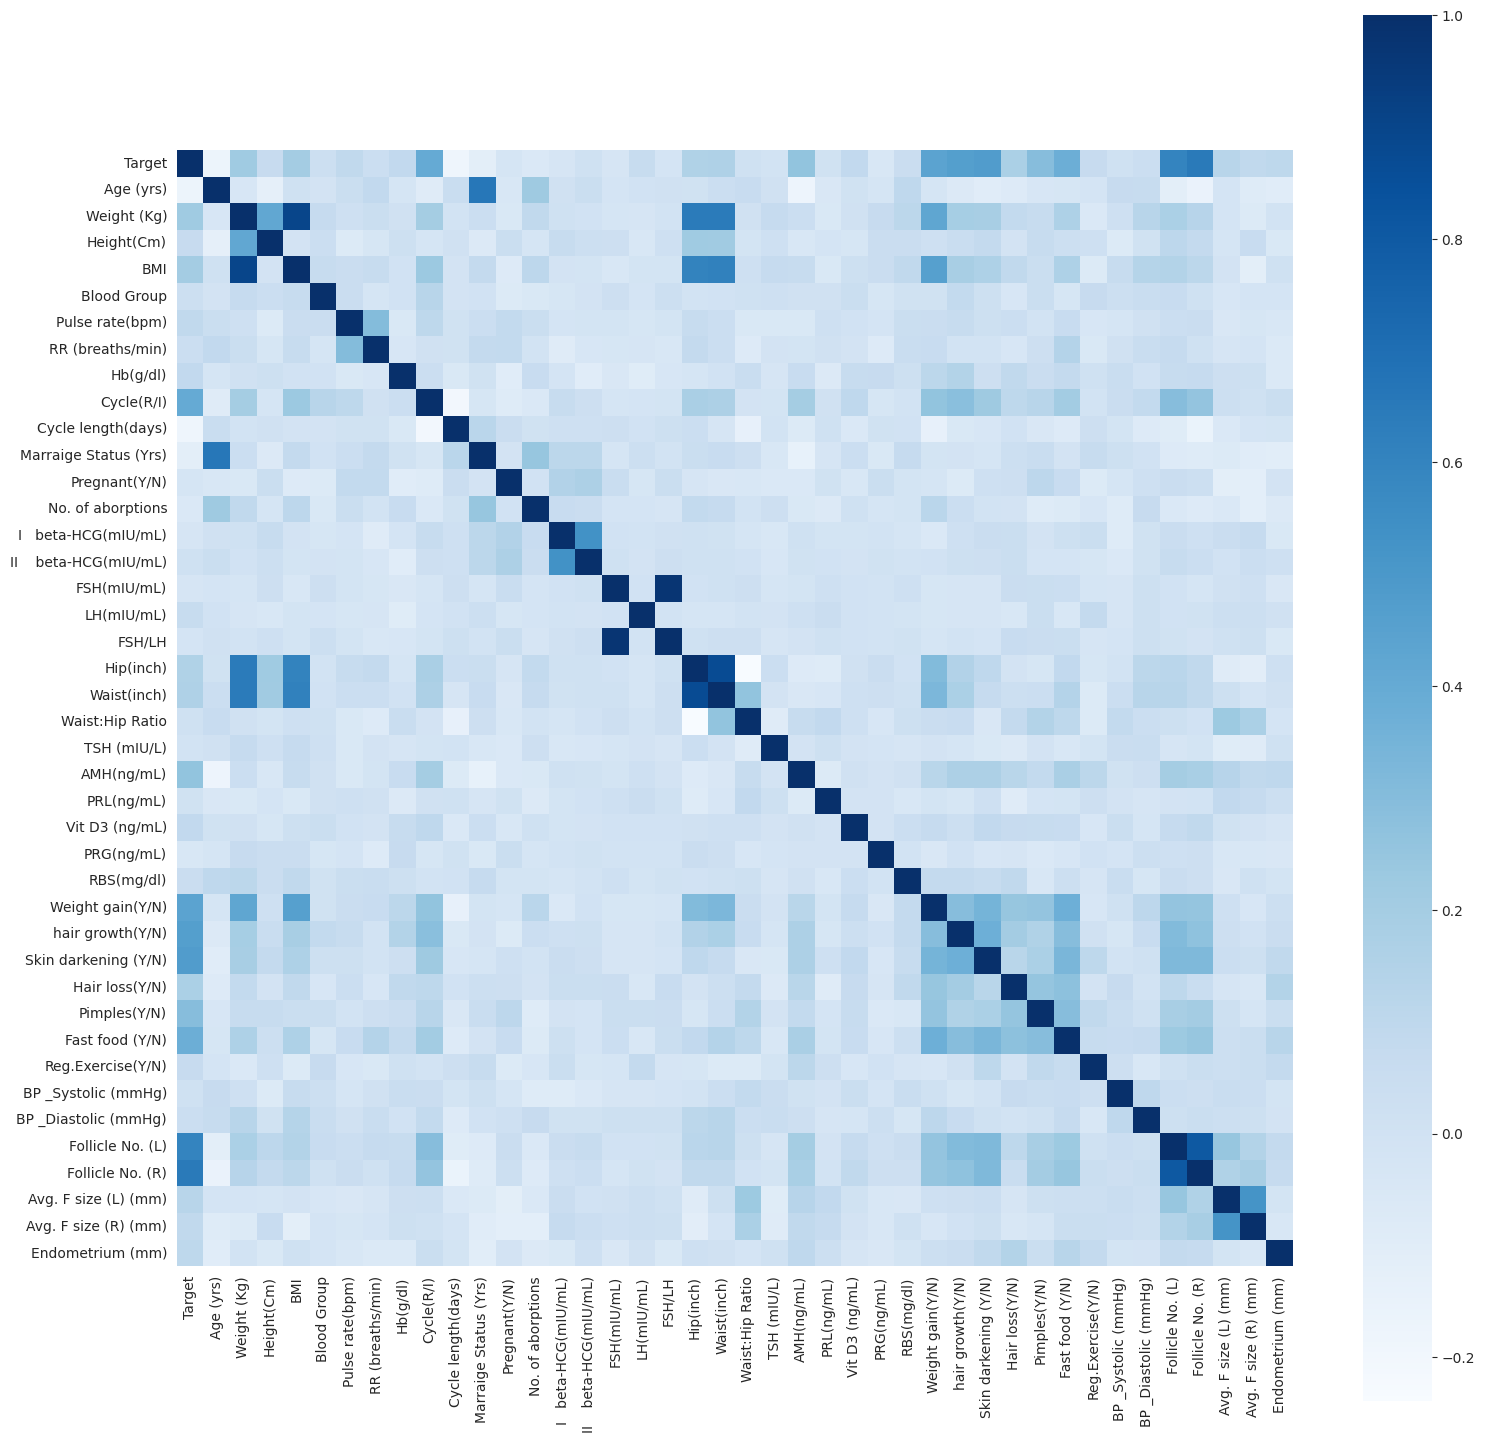

In [ ]:
# Examaning a correlation matrix of all the features.

corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Blues", square=True);

In [ ]:
# How all the features correlate with the PCOS.

corrmat['Target'].sort_values(ascending=False)

Target                    1.000000
Follicle No. (R)          0.649591
Follicle No. (L)          0.600376
Skin darkening (Y/N)      0.479234
hair growth(Y/N)          0.464201
Weight gain(Y/N)          0.441193
Cycle(R/I)                0.404407
Fast food (Y/N)           0.379460
Pimples(Y/N)              0.293782
AMH(ng/mL)                0.259442
Weight (Kg)               0.215770
BMI                       0.203884
Hair loss(Y/N)            0.174093
Waist(inch)               0.159339
Hip(inch)                 0.156394
Avg. F size (L) (mm)      0.128089
Endometrium (mm)          0.103203
Avg. F size (R) (mm)      0.093478
Pulse rate(bpm)           0.092428
Hb(g/dl)                  0.089103
Vit D3 (ng/mL)            0.086195
Height(Cm)                0.068536
Reg.Exercise(Y/N)         0.067619
LH(mIU/mL)                0.064239
RBS(mg/dl)                0.050688
RR (breaths/min)          0.040696
BP _Diastolic (mmHg)      0.037020
Blood Group               0.032041
Waist:Hip Ratio     

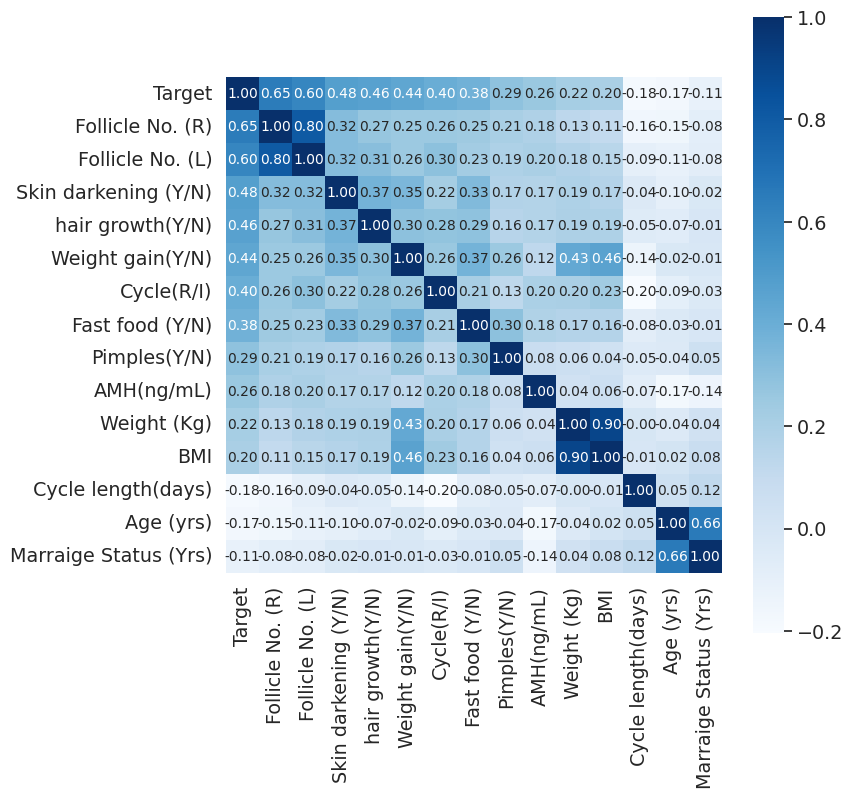

In [ ]:
# Having a look at features bearing significant correlation.

plt.figure(figsize=(8,8))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k,'Target')['Target'].index
cols_n = corrmat.nsmallest(l, 'Target')['Target'].index
cols = cols_p.append(cols_n)

cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Blues", annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Patterns Of Length Of The Menstrual Cycle

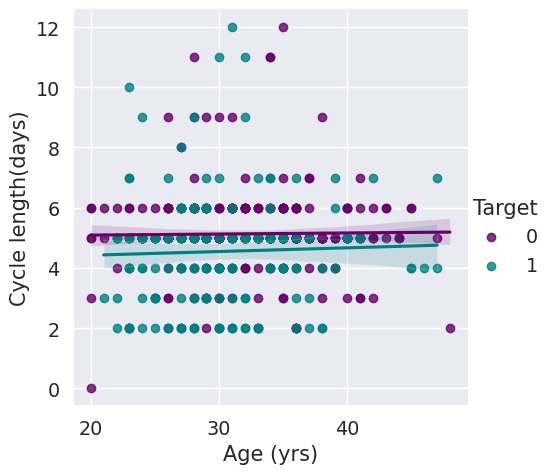

In [ ]:
# Length of menstrual phase in PCOS vs normal

fig=sns.lmplot(data=data,x="Age (yrs)",y="Cycle length(days)", hue="Target",palette=colors)
plt.show(fig)

The length of the menstrual phase is overall consistent over different ages for normal cases. Whereas in the case of PCOD the length increased with age.

# Patterns Of BMI

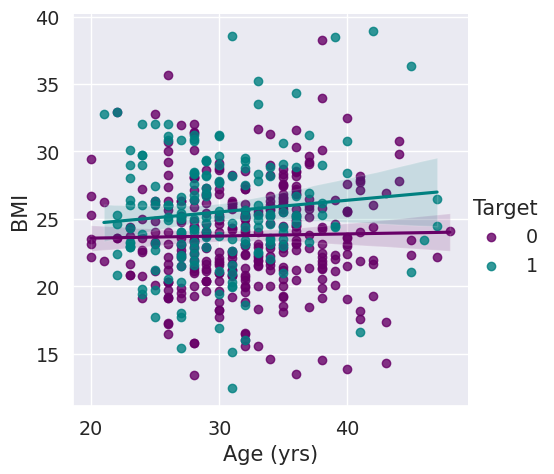

In [ ]:
# Pattern of weight gain (BMI) over years in PCOS and Normal.

fig= sns.lmplot(data =data,x="Age (yrs)",y="BMI", hue="Target", palette= colors )
plt.show(fig)

Body mass index (BMI) is showing consistency for normal cases. Whereas for PCOS the BMI increases with age.

# Patterns Of Irregularity In Mensuration

Apparently in the feature "Cycle(R/I)" value:

4 indicates irregular menstrual cycle

2 indicates a regular menstrual cycle

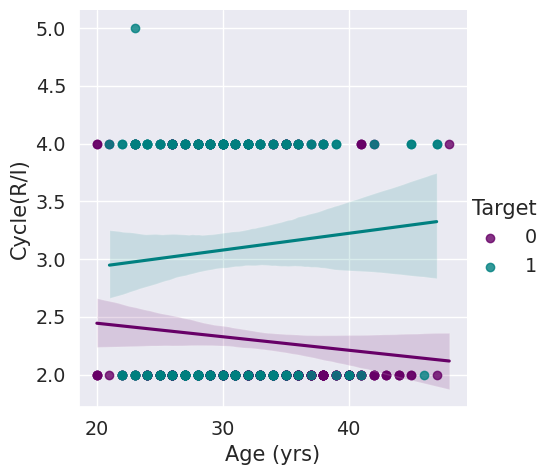

In [ ]:
# Cycle IR wrt age

sns.lmplot(data =data,x="Age (yrs)",y="Cycle(R/I)", hue="Target",palette=colors)
plt.show()

The mensural cycle becomes more regular for normal cases with age. Whereas, for PCOS the irregularity increases with age.

#Number Of Follicles

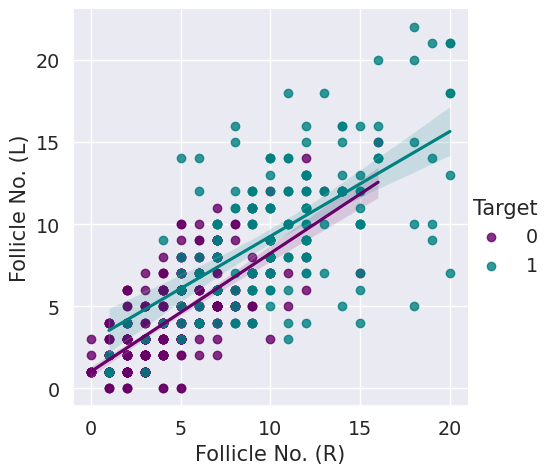

In [ ]:
# Distribution of follicles in both ovaries.

sns.lmplot(data =data,x='Follicle No. (R)',y='Follicle No. (L)', hue="Target",palette=colors)
plt.show()

The distribution of follicles in both ovaries Left and Right are not equal for women with PCOS in comparison with the "Normal" patient

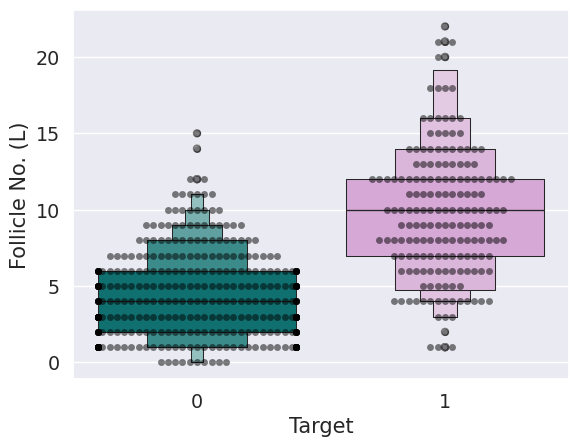

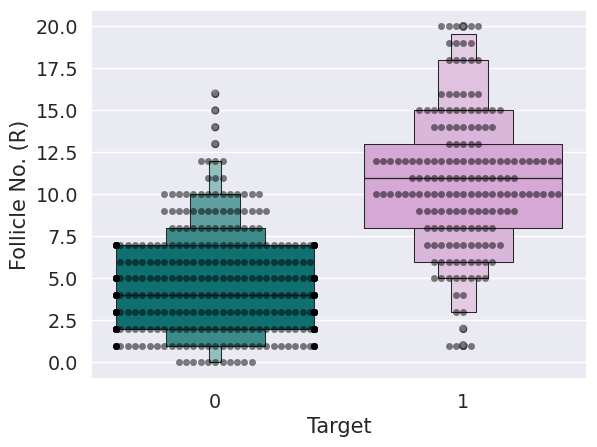

In [ ]:
# Exploring the above observation with the help of Boxplot

color = ["teal", "plum"]
features = ["Follicle No. (L)","Follicle No. (R)"]
for i in features:
    sns.swarmplot(x=data["Target"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["Target"], y=data[i], palette=color)
    plt.show()

The number of follicles in women with PCOS is higher, as expected. And are unequal as well

# Some Miscellaneous EDA

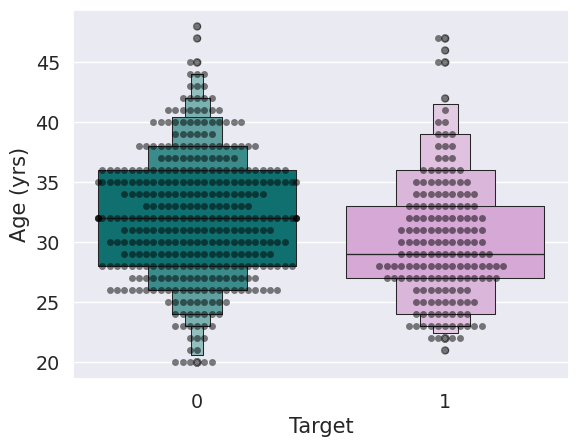

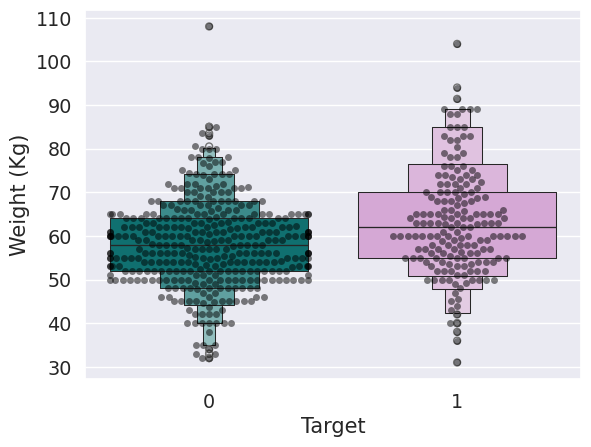

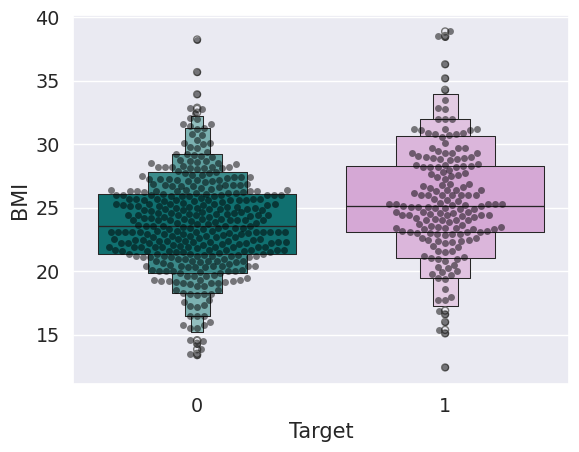

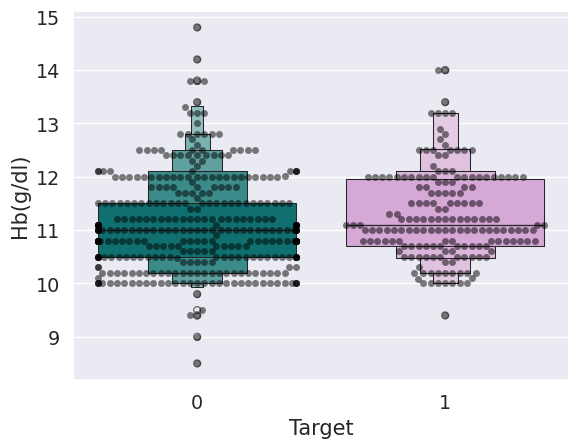

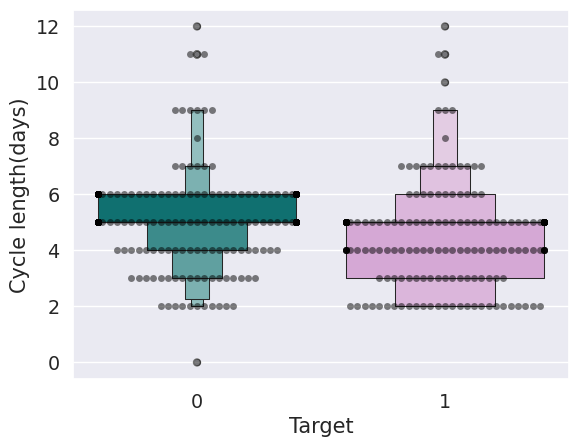

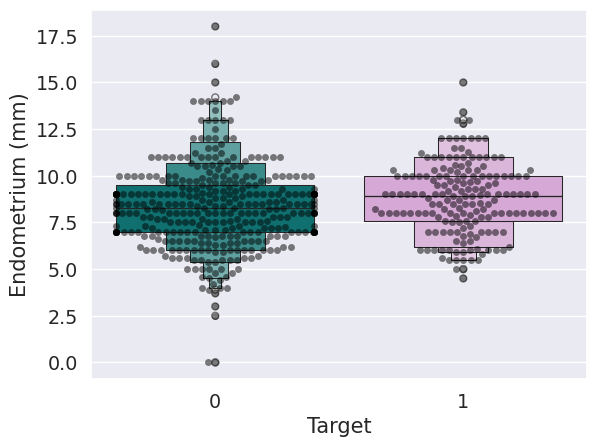

In [ ]:
features = ["Age (yrs)","Weight (Kg)", "BMI", "Hb(g/dl)", "Cycle length(days)","Endometrium (mm)" ]
for i in features:
    sns.swarmplot(x=data["Target"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["Target"], y=data[i], palette=color)
    plt.show()

###**DATA MODELING**

## Train - Test Split

In [ ]:
#Assiging the features (X)and target(y).

X= data.drop(labels = ["Target"],axis = 1)
y=data.Target

In [ ]:
#Splitting the data into test and training sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 375
X_test 162
y_train 375
y_test 162


In [ ]:

# Store accuracies
accuracies = {}

# Store confusion matrices
all_confusion_matrices = []

# Function to calculate and display confusion matrix and classification report
def evaluate_model(model_name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy

    cm = confusion_matrix(y_test, y_pred)
    all_confusion_matrices.append((model_name, cm))

    report = classification_report(y_test, y_pred)

    print(f'Accuracy of {model_name} classifier on test set: {accuracy:.2f}')
    print(f'Confusion Matrix for {model_name}:\n{cm}')
    print(f'Classification Report for {model_name}:\n{report}\n')

# Logistic Regression
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
evaluate_model("Logistic Regression", y_test, y_pred)

# SVM
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
evaluate_model("SVM", y_test, y_pred)

# Naive Bayes
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
evaluate_model("Naive Bayes", y_test, y_pred)

# Random Forest
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
evaluate_model("Random Forest", y_test, y_pred)

# K-nearest Neighbor
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
evaluate_model("K-nearest Neighbor", y_test, y_pred)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
evaluate_model("Decision Tree", y_test, y_pred)

# XGBoost

# Import XGBoost library
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost parameters
params = {'max_depth': 3,         # Maximum depth of a tree
          'eta': 0.1,             # Learning rate
          'objective': 'multi:softmax',  # Objective function: Multiclass softmax
          'num_class': 3}         # Number of classes in the dataset

# Number of boosting rounds
num_rounds = 10
# Train the XGBoost model
model = xgb.train(params, dtrain, num_rounds)
# Predict labels for the testing data and convert to integer type
y_pred = model.predict(dtest).astype(int)
# Evaluate the model using a custom function evaluate_model
evaluate_model("XGBoost", y_test, y_pred)


# CatBoost
catboost = CatBoostClassifier()
catboost.fit(X_train, y_train)
y_pred = catboost.predict(X_test)
evaluate_model("CatBoost", y_test, y_pred)



Accuracy of Logistic Regression classifier on test set: 0.86
Confusion Matrix for Logistic Regression:
[[97 11]
 [11 43]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       108
           1       0.80      0.80      0.80        54

    accuracy                           0.86       162
   macro avg       0.85      0.85      0.85       162
weighted avg       0.86      0.86      0.86       162


Accuracy of SVM classifier on test set: 0.67
Confusion Matrix for SVM:
[[108   0]
 [ 54   0]]
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       108
           1       0.00      0.00      0.00        54

    accuracy                           0.67       162
   macro avg       0.33      0.50      0.40       162
weighted avg       0.44      0.67      0.53       162


Accuracy of Naive Bayes classifier on test set: 0.

### **RESULT**

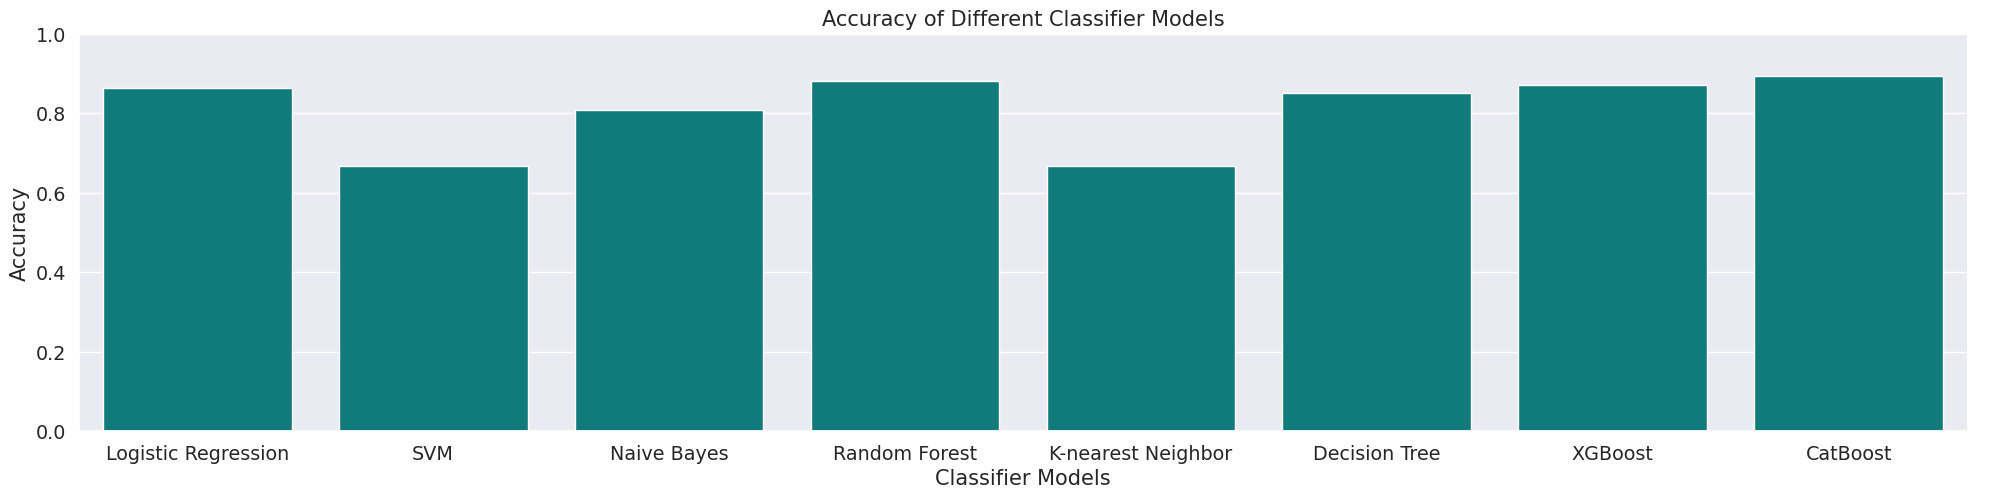

In [ ]:
import seaborn as sns
import pandas as pd

# Convert accuracies dictionary to DataFrame
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Classifier', 'Accuracy'])

# Plot using seaborn
sns.catplot(data=accuracy_df, x='Classifier', y='Accuracy', kind='bar', aspect=4, color='darkcyan')
plt.xlabel('Classifier Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifier Models')
# plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()



In [ ]:
import plotly.graph_objs as go

# Create data for the bar chart
data = [
    go.Bar(
        x=list(accuracies.keys()),
        y=list(accuracies.values()),
        marker=dict(color='darkcyan')
    )
]

# Create layout
layout = go.Layout(
    title='Accuracy of Different Classifier Models',
    xaxis=dict(title='Classifier Models'),
    yaxis=dict(title='Accuracy')
)

# Create figure
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()


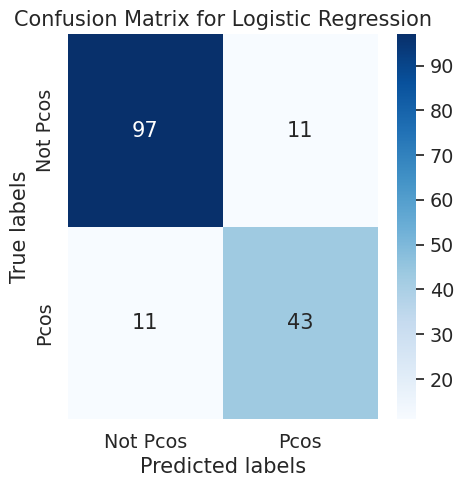

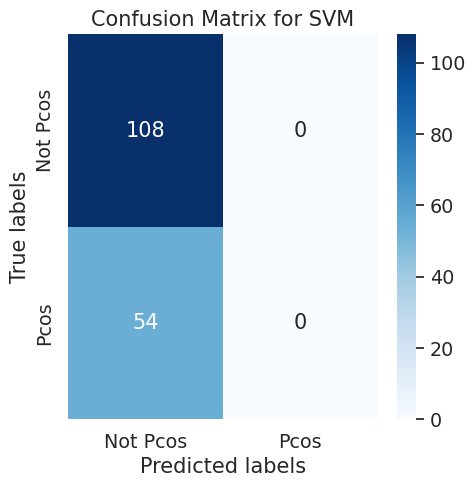

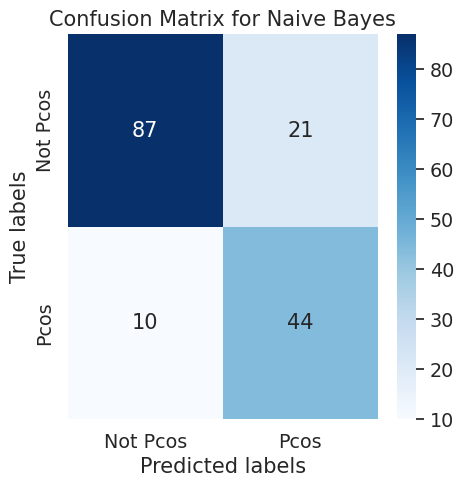

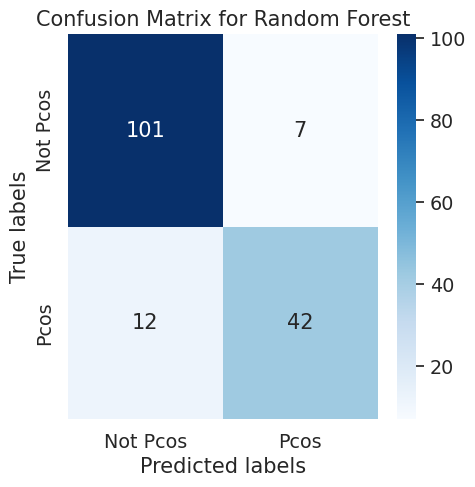

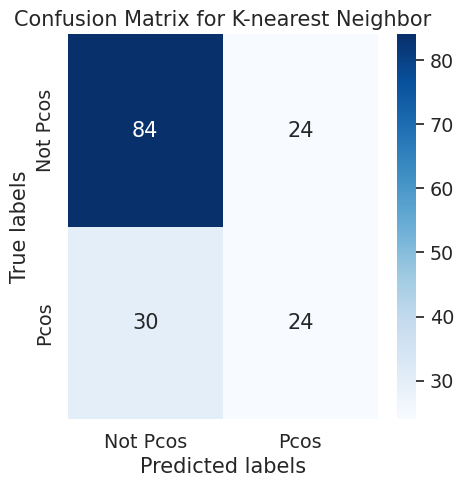

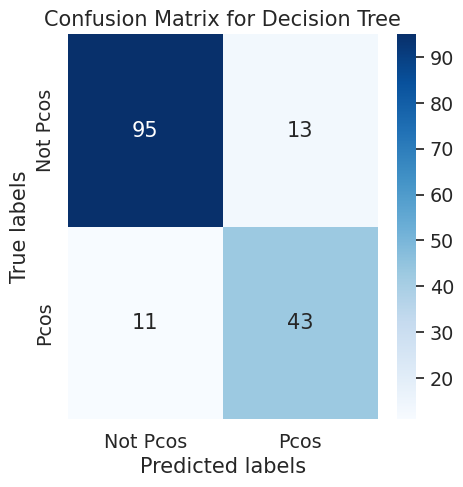

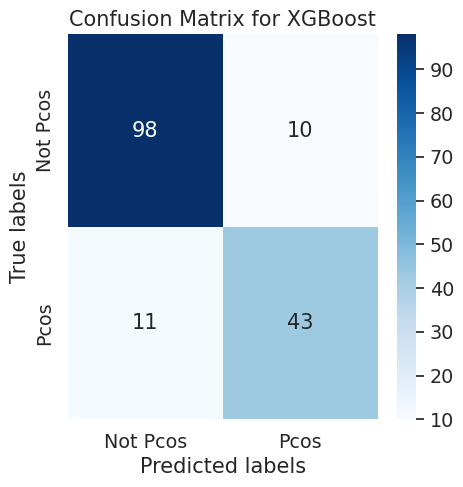

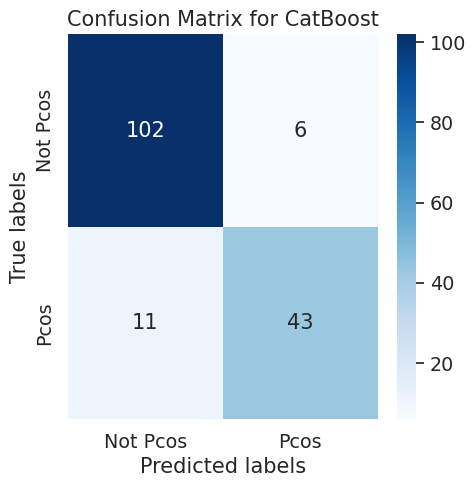

In [ ]:
import seaborn as sns

# Consolidated Confusion Matrices

for name, matrix in all_confusion_matrices:
    plt.figure(figsize=(5, 5))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Pcos", "Pcos"], yticklabels=["Not Pcos", "Pcos"])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
